In [4]:
from tdc.multi_pred import DTI
from uqdd.chemutils import scaffold_split

In [6]:
data_ic50 = DTI(path="../data/tdc/", name='BindingDB_IC50', print_stats=True)

Downloading...
100%|██████████| 839M/839M [03:11<00:00, 4.39MiB/s] 
Loading...
Done!


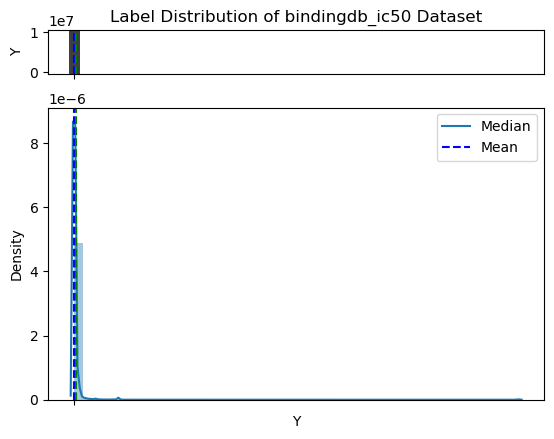

In [7]:
data_ic50.label_distribution()

In [13]:
# TODO: IC50 to pIC50 -> Done
data_ic50.convert_to_log(form='binding')

To log space...


In [ ]:
data_ic50.harmonize_affinities(mode='mean')

In [14]:
split = data_ic50.get_split(method='random', seed=42, frac=[0.7, 0.15, 0.15])

In [16]:
split['train'].shape, split['valid'].shape, split['test'].shape

((693441, 5), (148595, 5), (148594, 5))

In [17]:
data_ic50.harmonize_affinities(mode='mean')

The original data has been updated!


,Drug_ID,Drug,Target_ID,Target,Y
0,7.0,CCn1cnc2c(N)ncnc21,Q9BTU6,MDETSPLVSPERAQPPDYTFPSGSGAHFPQVPGGAVRVAAAAGSGP...,4.489454
1,19.0,O=C(O)c1cccc(O)c1O,Q11130,MNNAGHGPTRRLRGLGVLAGVALLAALWLLWLLGSAPRGTPAPQPT...,3.698970
2,45.0,O=C(O)C(O)C(=O)O,Q9QZX7,MCAQYCISFADVEKAHINIQDSIHLTPVLTSSILNQIAGRNLFFKC...,4.026872
3,51.0,O=C(O)CCC(=O)C(=O)O,Q63089,MPTVDDVLEQVGEFGWFQKQAFLLLCLISASLAPIYVGIVFLGFTP...,3.130768
4,51.0,O=C(O)CCC(=O)C(=O)O,Q9R0W2,MSTVDDILEHIGEFHLFQKQTFFLLALLSGAFTPIYVGIVFLGFTP...,3.154902
...,...,...,...,...,...
766899,145866835.0,N[C@H]1CC[C@H](NC(=O)c2ccc3[nH]c(=O)[nH]c3c2)CC1,Q9H7B4,MEPLKVEKFATAKRGNGLRAVTPLRPGELLFRSDPLAYTVCKGSRG...,4.863276
766900,145866836.0,CC(NC(=O)c1ccc2[nH]c(=O)[nH]c2c1)C1CCN(C(=O)[C...,Q9H7B4,MEPLKVEKFATAKRGNGLRAVTPLRPGELLFRSDPLAYTVCKGSRG...,5.170047
766901,145866837.0,CC(NC(=O)c1cc[n+]([O-])cc1)C1CCN(C(=O)[C@H](C)...,Q9H7B4,MEPLKVEKFATAKRGNGLRAVTPLRPGELLFRSDPLAYTVCKGSRG...,4.000000
766902,145866838.0,N[C@H]1CC[C@H](NC(=O)c2cc[n+]([O-])cc2)CC1,Q9H7B4,MEPLKVEKFATAKRGNGLRAVTPLRPGELLFRSDPLAYTVCKGSRG...,4.000000


In [18]:
split = data_ic50.get_split(method='random', seed=42, frac=[0.7, 0.15, 0.15])
split['train'].shape, split['valid'].shape, split['test'].shape

((536832, 5), (115036, 5), (115036, 5))

In [19]:
# TODO: Add scaffold split
split = dict()
# Scaffold-splitting of the data
df = data_ic50.get_data().rename(columns={'Drug': 'smiles'})
split['train'], split['valid'], split['test'] = scaffold_split(
                df, train_frac=0.7, val_frac=0.15, test_frac=0.15, seed=42
            )
split['train'].shape, split['valid'].shape, split['test'].shape

KeyError: 'valid'

In [20]:
split['train'].shape, split['valid'].shape, split['test'].shape

((544063, 6), (109892, 6), (112949, 6))

In [11]:
cold_drug_split = data_ic50.get_split(method='cold_split', column_name="Drug", seed=42, frac=[0.7, 0.15, 0.15])

In [12]:


# TODO: How to use LLMs for protein embeddings from Sequence or 3D structure -> Vector?
# TODO: ProteoChemometrics: How to use protein-ligand interaction fingerprints together in the same model with one head for prediction?

# TODO: how to use KGs here?

AttributeError: 'DataFrame' object has no attribute 'label_distribution'

In [21]:
from tdc import BenchmarkGroup
group = BenchmarkGroup(name = 'DTI_DG_Group', path = '../data/tdc/')
benchmark = group.get('BindingDB_Patent')

tdc.BenchmarkGroup will be deprecated soon. Please use tdc.benchmark_group.XXX_group and check out the examples on website!
100%|██████████| 9.52M/9.52M [00:02<00:00, 3.23MiB/s]
Extracting zip file...
Done!


In [22]:
from tdc.benchmark_group import dti_dg_group
group = dti_dg_group(path='../data/tdc/')

Found local copy...


In [23]:
benchmark = group.get('BindingDB_Patent')

In [ ]:

predictions = {}
name = benchmark['name']
train_val, test = benchmark['train_val'], benchmark['test']


In [ ]:
train, valid = group.get_train_valid_split(benchmark = name, split_type = 'default', seed = 42, frac = [0.875, 0.125])
## --- train your model --- ##

predictions[name] = pred_test
out = group.evaluate(predictions)